In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocess the data
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Define the MLP model with different activation functions
def create_mlp_model(activation):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Train and evaluate models with different activation functions
activations = ['relu', 'sigmoid', 'tanh']
models = []
accuracies = []

for activation in activations:
    print(f"Training MLP with {activation} activation")
    model = create_mlp_model(activation)
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.1,
                        verbose=1)

    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy with {activation} activation: {accuracy}\n")

    models.append(model)
    accuracies.append(accuracy)

Training MLP with relu activation
Epoch 1/10
422/422 [==============================] - 6s 11ms/step - loss: 0.4736 - accuracy: 0.8553 - val_loss: 0.1493 - val_accuracy: 0.9548
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2099 - accuracy: 0.9376 - val_loss: 0.1105 - val_accuracy: 0.9678
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 0.1580 - accuracy: 0.9535 - val_loss: 0.0871 - val_accuracy: 0.9723
Epoch 4/10
422/422 [==============================] - 4s 8ms/step - loss: 0.1321 - accuracy: 0.9613 - val_loss: 0.0831 - val_accuracy: 0.9763
Epoch 5/10
422/422 [==============================] - 4s 9ms/step - loss: 0.1114 - accuracy: 0.9664 - val_loss: 0.0776 - val_accuracy: 0.9773
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0970 - accuracy: 0.9704 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0867 - accuracy: 0.9734 - val_loss: 0

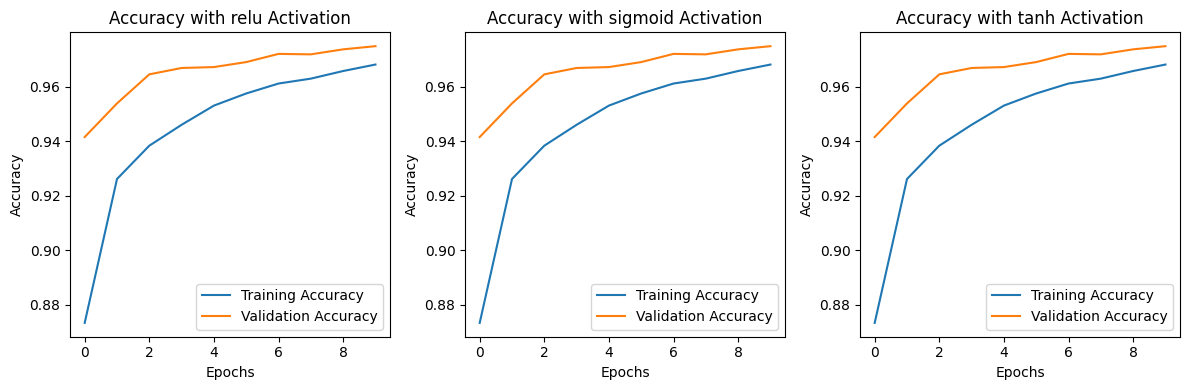

In [ ]:
# Plot the training and validation accuracy for each model
plt.figure(figsize=(12, 4))
for i, activation in enumerate(activations):
    plt.subplot(1, 3, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy with {activation} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

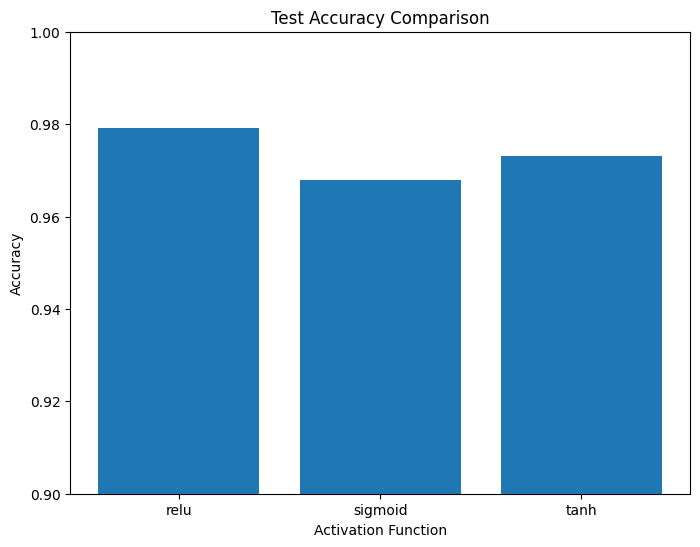

In [ ]:
# Compare the test accuracies of different models
plt.figure(figsize=(8, 6))
plt.bar(activations, accuracies)
plt.title('Test Accuracy Comparison')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.show()